In [ ]:
---
title: "Current Sentiment Clustering"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  warning: false
  message: false
---

---
title: "Current Sentiment Clustering"
format:
  html:
    embed-resources: true
    code-fold: true
execute:
  warning: false
  message: false
---

In the evolving landscape of the insurance industry, understanding customer behavior and preferences is paramount for enhancing service quality, managing risk, and optimizing business strategies. With the proliferation of data on customer interactions, claims, and policies, advanced analytical techniques have become essential for deriving actionable insights from large and complex datasets. This study leverages clustering and correlation analysis to uncover patterns in customer behavior, sentiment, and claim characteristics, aiming to segment the customer base and reveal insights that can guide targeted decision-making.

In [5]:
import pandas as pd

file_path = "../../data/cleaned_data/current_first_half_merged.csv"
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,Customer,state,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Employment Status,...,Sales Channel Index,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index,month,year,avg_sentiment_score,avg_sentiment
0,1,QC35222,California,3622.69,No,Basic,0,Bachelor,2,Employed,...,0,380.90,Four-Door Car,1,Medsize,1,1,2024,-0.223594,Negative
1,2,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,Unemployed,...,1,1098.36,SUV,4,Medsize,1,1,2024,-0.371933,Negative
2,3,TM23514,Oregon,13868.02,No,Extended,1,College,1,Employed,...,0,783.64,SUV,4,Medsize,1,1,2024,0.078810,Positive
3,4,WB38524,California,4008.95,No,Basic,0,High School or Below,0,Employed,...,1,479.52,Two-Door Car,0,Small,0,1,2024,-0.223594,Negative
4,5,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,Unemployed,...,2,622.08,Four-Door Car,1,Medsize,1,1,2024,-0.371933,Negative


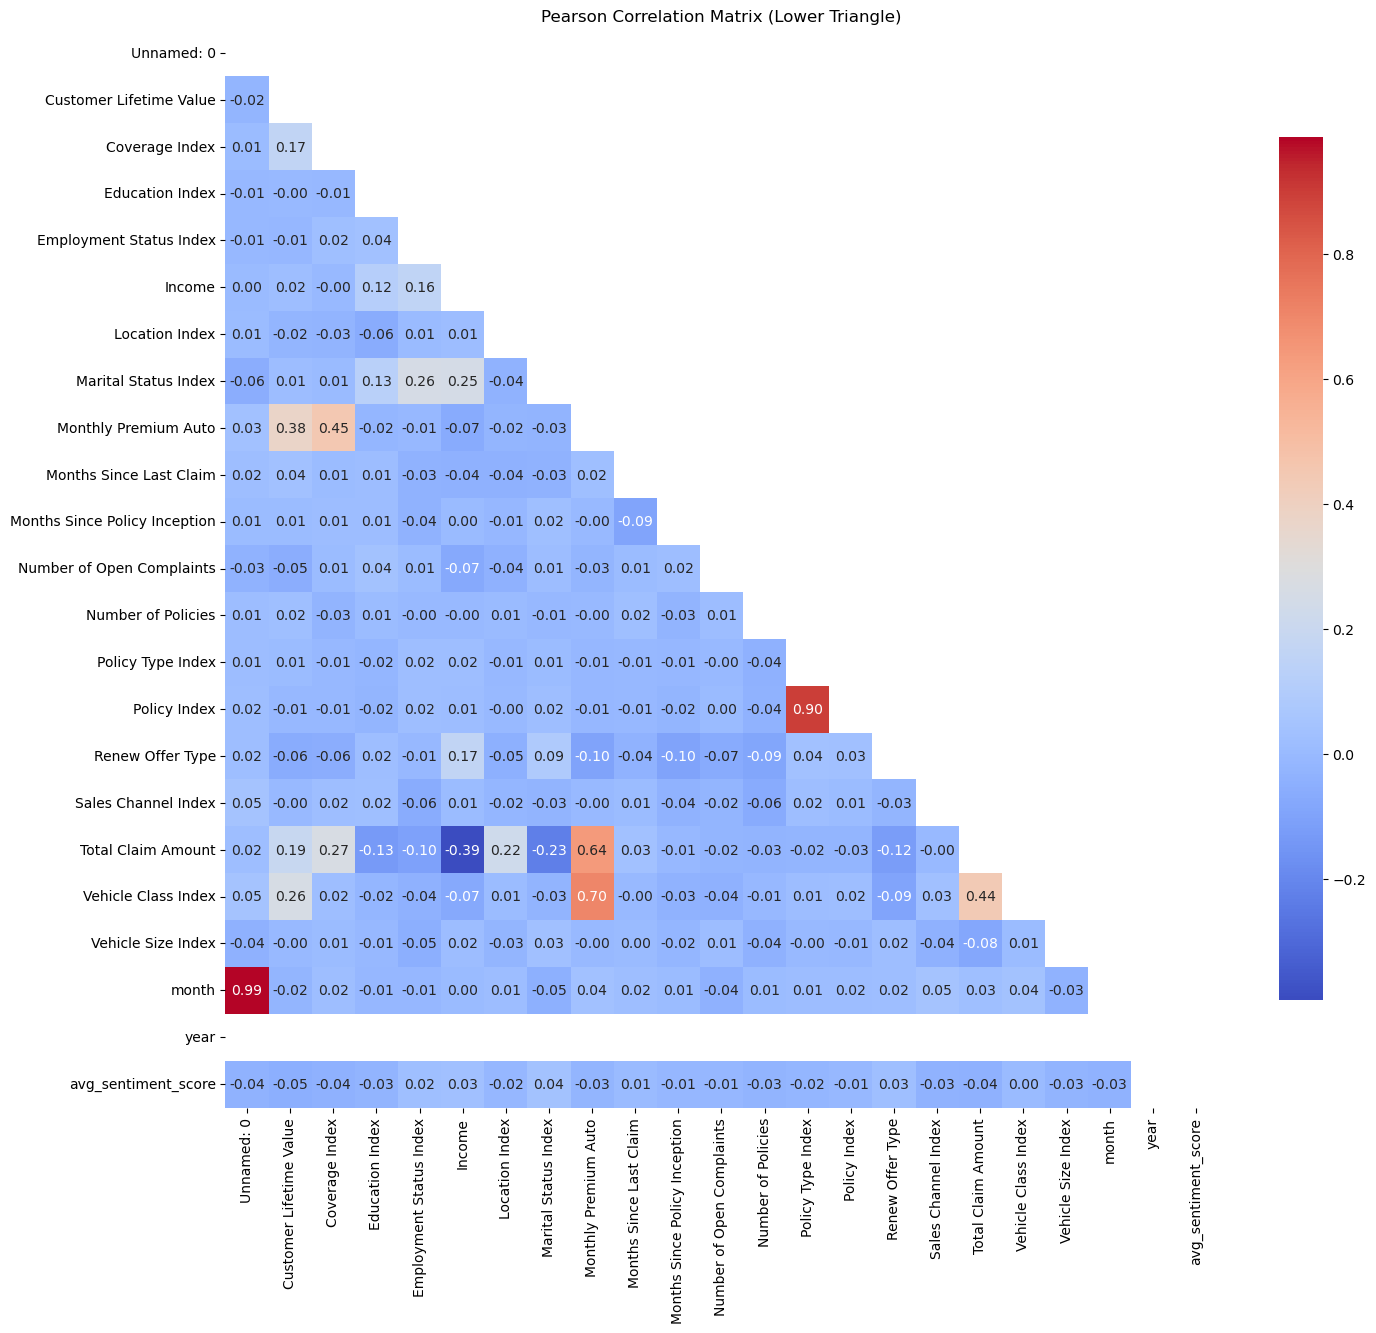

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data_1 = data.select_dtypes(include=['float64', 'int64'])

pearson_corr = numeric_data_1.corr(method='pearson')

mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Create a heatmap with the mask applied
plt.figure(figsize=(16, 14))
sns.heatmap(pearson_corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
plt.title("Pearson Correlation Matrix (Lower Triangle)")
plt.show()

There’s a positive correlation between income and policy type (comprehensive policies) – wealthier customers tend to prefer more extensive coverage. On the other hand, negative correlation between sentiment score and claim amount – customers with more positive sentiments tend to file fewer claims.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
data['state_encoded'] = le.fit_transform(data['state'])

In [11]:
data.head()

,Unnamed: 0,Customer,state,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Employment Status,...,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index,month,year,avg_sentiment_score,avg_sentiment,state_encoded
0,1,QC35222,California,3622.69,No,Basic,0,Bachelor,2,Employed,...,380.90,Four-Door Car,1,Medsize,1,1,2024,-0.223594,Negative,1
1,2,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,Unemployed,...,1098.36,SUV,4,Medsize,1,1,2024,-0.371933,Negative,4
2,3,TM23514,Oregon,13868.02,No,Extended,1,College,1,Employed,...,783.64,SUV,4,Medsize,1,1,2024,0.078810,Positive,3
3,4,WB38524,California,4008.95,No,Basic,0,High School or Below,0,Employed,...,479.52,Two-Door Car,0,Small,0,1,2024,-0.223594,Negative,1
4,5,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,Unemployed,...,622.08,Four-Door Car,1,Medsize,1,1,2024,-0.371933,Negative,4


In [12]:
data_1 = data.select_dtypes(include=['float64', 'int64'])
# Check standard deviation
low_variance_cols = data_1.std()[data_1.std() < 0.1].index

In [13]:
print("Low variance columns:", low_variance_cols)

Low variance columns: Index(['year'], dtype='object')


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

In [15]:
df_numeric = data_1.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [16]:
X = df_numeric.drop(['Unnamed: 0', 'avg_sentiment_score', 'year', 'state_encoded', 'month'], axis=1)
y = data['avg_sentiment']

In [17]:
# Encode categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1470, 19)
Test set size: (368, 19)


In [19]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf.predict(X_test)

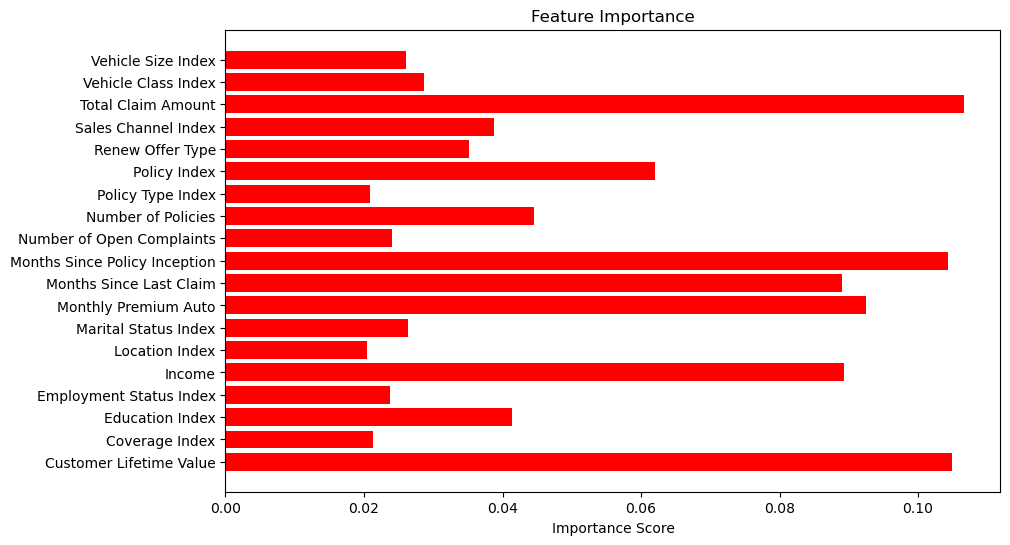

In [21]:
import matplotlib.pyplot as plt

# Feature importance from the model
importances = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='red')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [22]:
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')

Customer Lifetime Value: 0.10488085128522988
Coverage Index: 0.021341145274838724
Education Index: 0.04129707109778181
Employment Status Index: 0.023795706460716493
Income: 0.08934990199837156
Location Index: 0.020463934367078586
Marital Status Index: 0.026364747430158608
Monthly Premium Auto: 0.09245887603733369
Months Since Last Claim: 0.08907213126262188
Months Since Policy Inception: 0.10437893277094247
Number of Open Complaints: 0.02399823881895443
Number of Policies: 0.044530847297521686
Policy Type Index: 0.020903394925031585
Policy Index: 0.06207740206426565
Renew Offer Type: 0.03510960952603887
Sales Channel Index: 0.038746061779391834
Total Claim Amount: 0.10656067488971306
Vehicle Class Index: 0.02867249319535218
Vehicle Size Index: 0.02599797951865706


We use models like random forest to assess feature importance to see features with high importance scores. When we are selecting the optimal features combination, be careful to exclude features that are highly correlated with each other, as they might introduce multicollinearity and redundancy. The feature importance plot shows how each attribute contributes to the prediction of cluster membership. Features with higher importance values have a more significant influence on determining the clusters. 

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select relevant features for clustering
features = data[['Income', 'Policy Type', 'Number of Open Complaints', 
                 'Vehicle Class', 'Total Claim Amount', 
                 'avg_sentiment_score', 'avg_sentiment', 'Monthly Premium Auto']]

# Encode categorical features (e.g., avg_sentiment, Policy Type, Vehicle Class)
label_encoders = {}
categorical_columns = ['Policy Type', 'Vehicle Class', 'avg_sentiment']

for col in categorical_columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for clarity
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the prepared data
scaled_features_df.head()

/tmp/ipykernel_149/2096181636.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
/tmp/ipykernel_149/2096181636.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
/tmp/ipykernel_149/2096181636.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Income,Policy Type,Number of Open Complaints,Vehicle Class,Total Claim Amount,avg_sentiment_score,avg_sentiment,Monthly Premium Auto
0,0.313373,-1.820746,3.177325,-0.883569,-0.517532,-0.587768,-0.690552,-0.688114
1,-1.250543,0.356568,-0.407649,0.554023,1.236955,-1.149417,-0.690552,0.574745
2,0.698166,0.356568,-0.407649,0.554023,0.467334,0.557206,1.346743,1.100936
3,0.244109,0.356568,-0.407649,1.512417,-0.276365,-0.587768,-0.690552,-0.540780
4,-1.250543,0.356568,-0.407649,-0.883569,0.072253,-1.149417,-0.690552,-0.835447


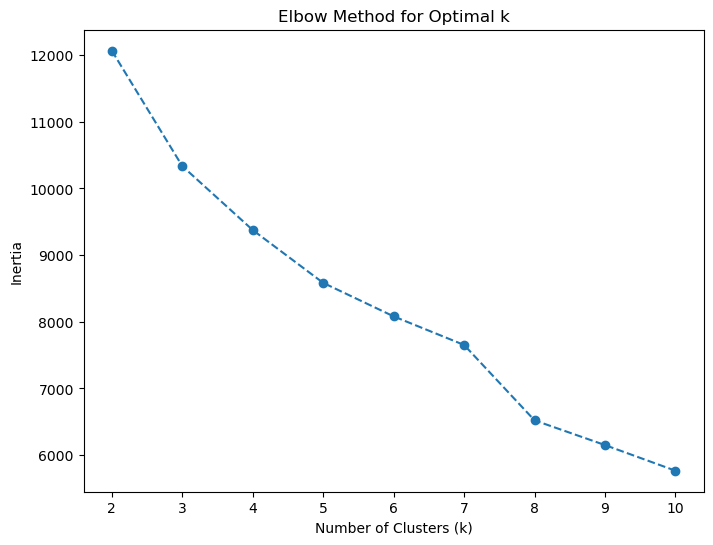

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(2, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

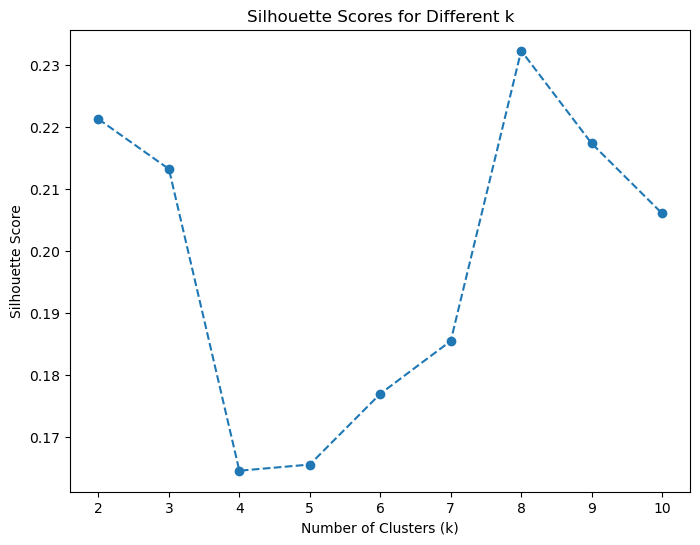

The best cluster number is: 8


In [25]:
# Calculate Silhouette Scores for each cluster count
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Optimal number of clusters based on Silhouette Scores
optimal_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("The best cluster number is:", optimal_k)

Here, we use the elbow method and calculate the silhouette scores for each cluster count. The silhouette score measures how well each point fits within its assigned cluster. Higher scores indicate better-defined clusters. Based on the data visualization and highest Silhouette Score, k=8 provides the most cohesive and separated clusters in this analysis.

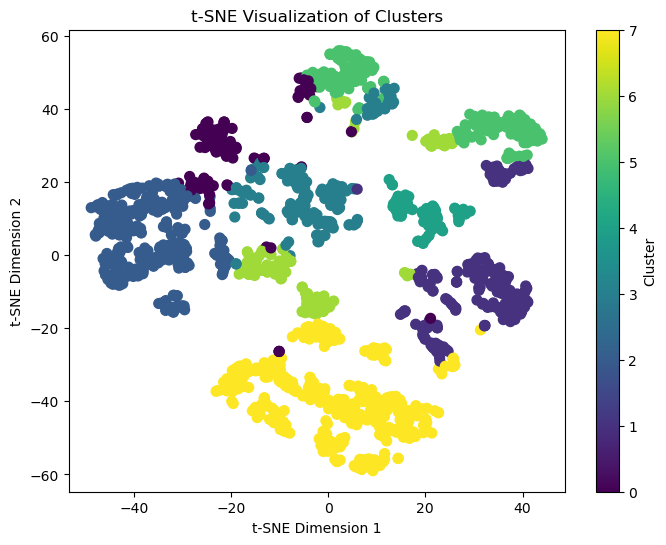

In [26]:
from sklearn.manifold import TSNE

# Perform K-Means clustering with the optimal number of clusters (k=2)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original scaled features for visualization
scaled_features_df['Cluster'] = cluster_labels

# Use t-SNE to reduce data to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Visualize clusters in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Clusters')
plt.show()

Perform k-means clustering with the optimal number of clusters. The clusters are generally well-separated, indicating that the K-Means algorithm successfully grouped data points with similar characteristics. There are areas of tight clustering (yellow cluster in the bottom) where data points are highly similar. Then we use dimension reduction techniques t-SNE to reduce the dimensions to two dimensions. The yellow cluster at the bottom might represent data points with strong similarity in features like sentiment, claim amount, or premium.

In [28]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# data['Cluster'] = cluster_labels

# # Dive deeper into specific attributes by comparing clusters
# attributes_to_explore = ['Income', 'Policy Type', 'Number of Open Complaints', 
#                  'Vehicle Class', 'Total Claim Amount', 
#                  'avg_sentiment_score', 'avg_sentiment', 'Monthly Premium Auto']

# # Create boxplots to compare attribute distributions across clusters
# for attribute in attributes_to_explore:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis")
#     plt.title(f"Distribution of {attribute} Across Clusters")
#     plt.xlabel("Cluster")
#     plt.ylabel(attribute)
#     plt.show()

# # Visualize the relationship between sentiment score and claim amount for both clusters
# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     x="avg_sentiment_score",
#     y="Total Claim Amount",
#     hue="Cluster",
#     data=data,
#     palette="viridis",
#     alpha=0.7
# )
# plt.title("Sentiment Score vs Total Claim Amount by Cluster")
# plt.xlabel("Average Sentiment Score")
# plt.ylabel("Total Claim Amount")
# plt.legend(title="Cluster")
# plt.show()

/tmp/ipykernel_149/2303981092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
/tmp/ipykernel_149/2303981092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")


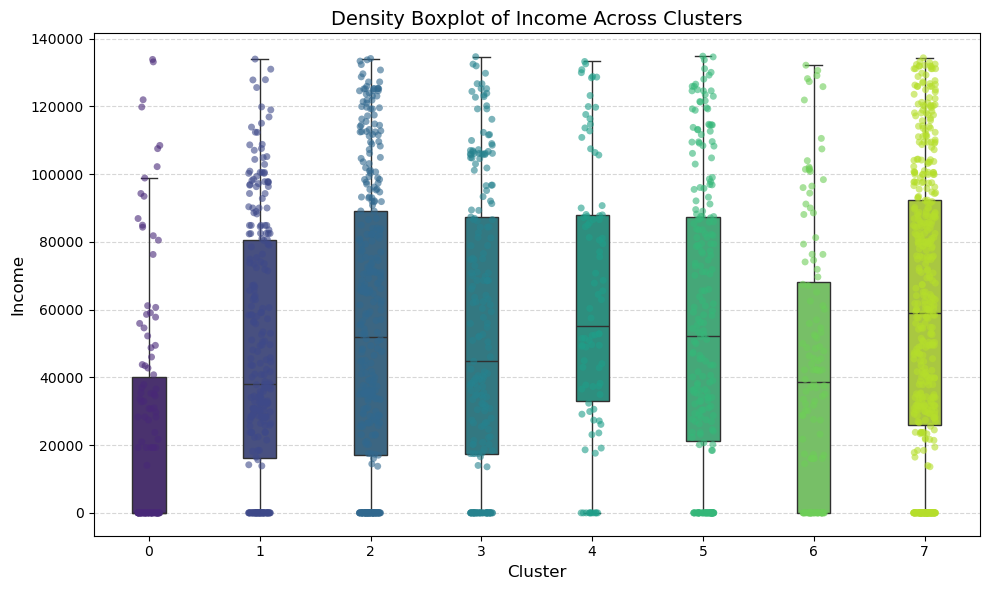

/tmp/ipykernel_149/2303981092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
/tmp/ipykernel_149/2303981092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")


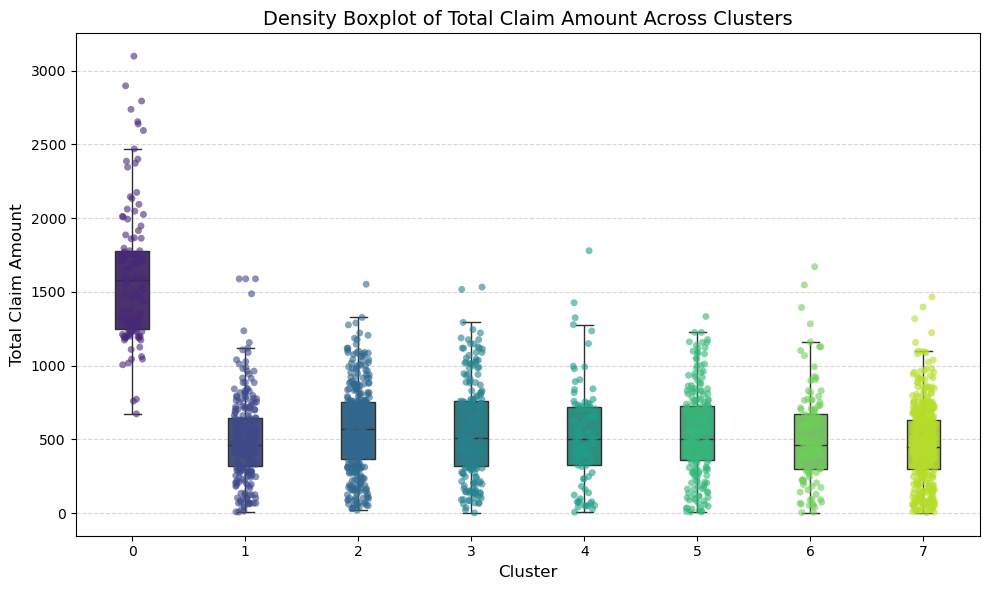

/tmp/ipykernel_149/2303981092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
/tmp/ipykernel_149/2303981092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")


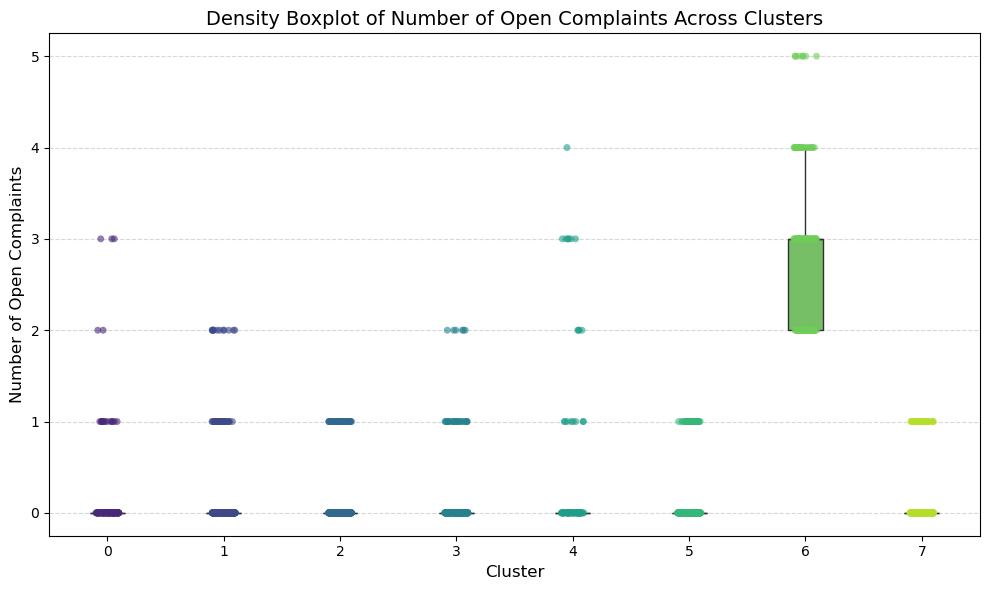

/tmp/ipykernel_149/2303981092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
/tmp/ipykernel_149/2303981092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")


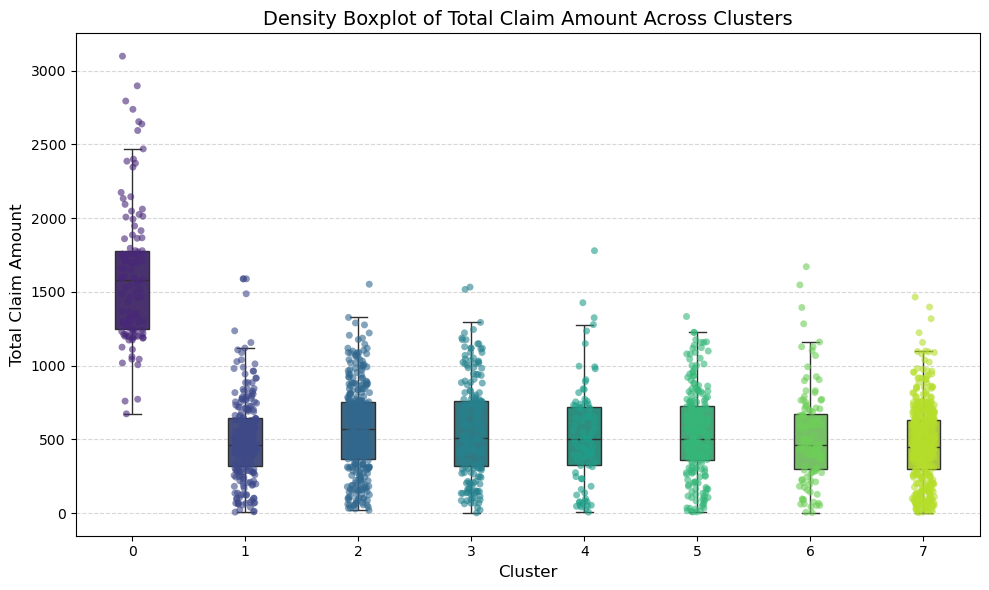

/tmp/ipykernel_149/2303981092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
/tmp/ipykernel_149/2303981092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")


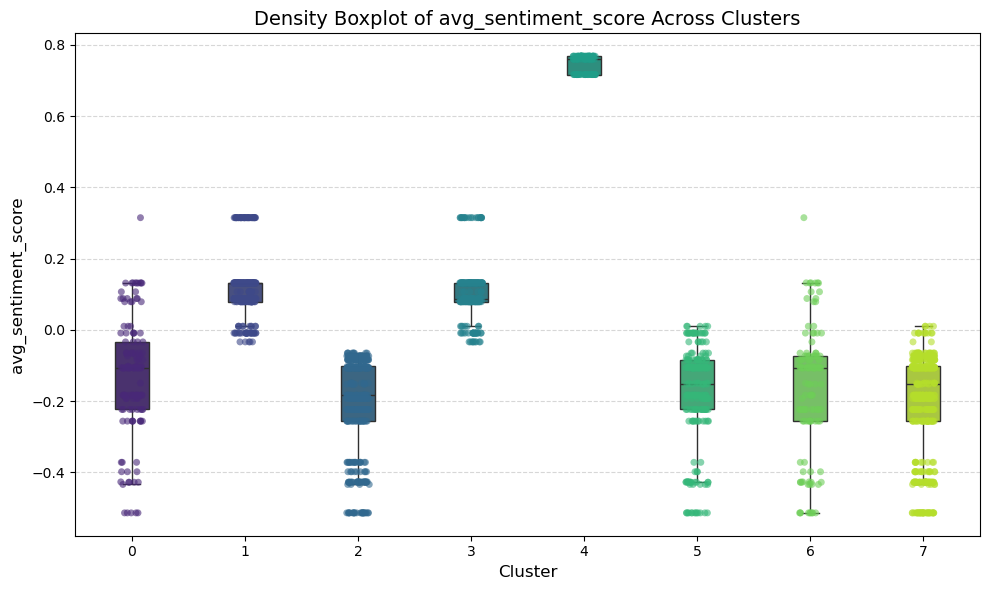

/tmp/ipykernel_149/2303981092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
/tmp/ipykernel_149/2303981092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")


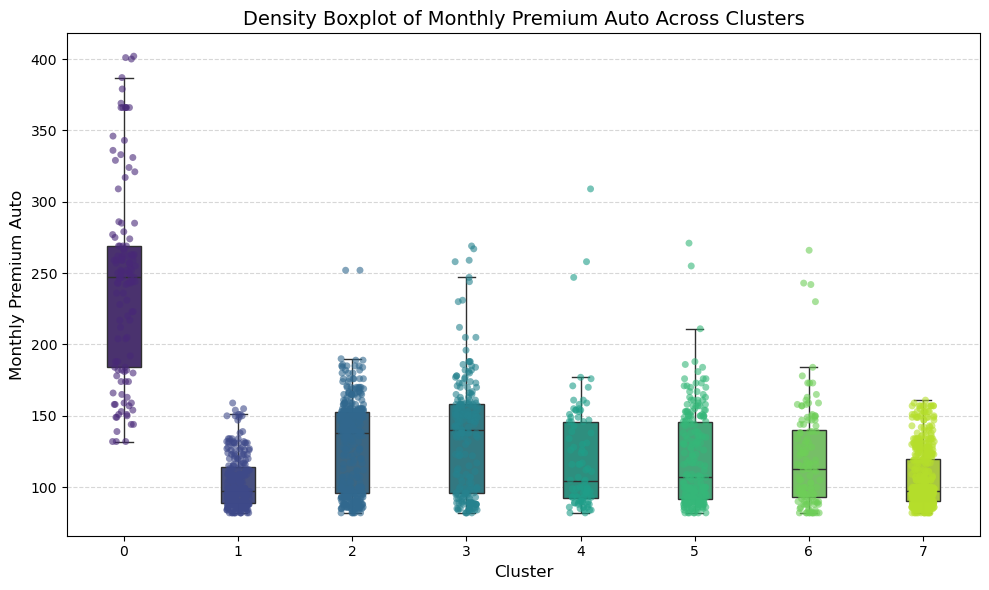

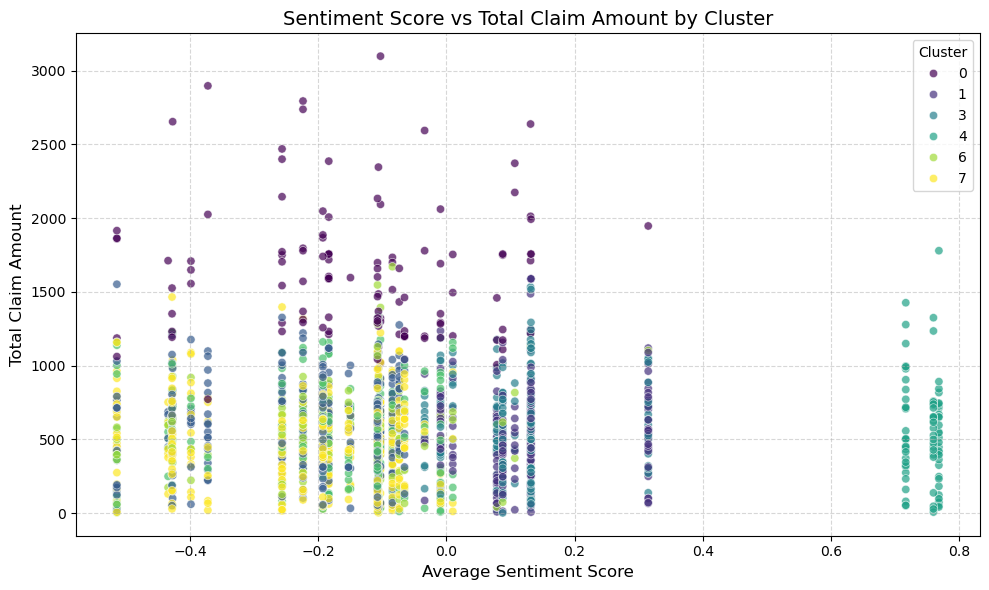

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Cluster'] = cluster_labels

attributes_to_explore = ['Income', 'Total Claim Amount', 'Number of Open Complaints', 
                        'Total Claim Amount', 'avg_sentiment_score', 'Monthly Premium Auto']

for attribute in attributes_to_explore:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Cluster", y=attribute, data=data, palette="viridis", showfliers=False, width=0.3)
    sns.stripplot(x="Cluster", y=attribute, data=data, jitter=True, alpha=0.6, palette="viridis")
    plt.title(f"Density Boxplot of {attribute} Across Clusters", fontsize=14)
    plt.xlabel("Cluster", fontsize=12)
    plt.ylabel(attribute, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="avg_sentiment_score",
    y="Total Claim Amount",
    hue="Cluster",
    data=data,
    palette="viridis",
    alpha=0.7
)
plt.title("Sentiment Score vs Total Claim Amount by Cluster", fontsize=14)
plt.xlabel("Average Sentiment Score", fontsize=12)
plt.ylabel("Total Claim Amount", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

The scatterplot visualizes the relationship between average sentiment score and total claim amount, with points color-coded by cluster. This plot helps identify patterns, such as how sentiment relates to claim amounts for different clusters.

# Interpretations

This analysis successfully segmented the customer base into 8 distinct clusters, offering valuable insights into customer behavior, sentiment, income, and claims patterns. By employing K-means clustering with k=8, the study identified cohesive and well-separated groups, each characterized by unique attributes and tendencies. The use of t-SNE further enabled effective visualization of these clusters, highlighting key differences and overlaps.

The findings revealed important correlations, such as the preference of wealthier customers for comprehensive insurance policies and the strong relationship between sentiment and claims behavior. Specifically, customers with positive sentiment tend to have lower claim amounts, reflecting higher satisfaction and fewer complaints, while negative sentiment correlates with higher claims and potential dissatisfaction. These observations underline the importance of monitoring customer sentiment as a predictive factor for claims and overall satisfaction.